# Example 1: A quick look at 5 deterministic machine-learning models

#### Huan Tran

Some deterministic (non-probabilistic) ML models supported by matsML are introduced here. They models are
1. Support Vector Regression
2. Random Forest Regression
3. Kernel Ridge Regression
4. Gaussian Process Regression
5. Fully-Connected Neural Net

A simple dataset will be obtained from www.matsml.org for this example.

__Load data__

This is a <em>fingerprinted</em> dataset, being ready for machine learning. It contains 192 compositions of hybrid organic-inorganic perovskites, each of them is represented by a fingerprint vector and the averaged band gap of multiple atomic structures predicted for this composition. This dataset was used in <em>Probabilistic deep learning approach for targeted hybrid organic-inorganic perovskites</em>, <a href="https://journals.aps.org/prmaterials/abstract/10.1103/PhysRevMaterials.5.125402">Physical Review Materials <b>5</b>, 125402 (2021)</a>, and the raw data leading to this dataset is available at <em>A hybrid organic-inorganic perovskite dataset</em>, <a href="https://www.nature.com/articles/sdata201757">Scientific Data <b>4</b>, 170057 (2017)</a>.

In [1]:
from matsml.data import Datasets
import pandas as pd

# obtain data
data = Datasets(S1='fp_hoips_S1_1dest')
data.load_dataset()

# Have a look at the data fields. You will see "ID" is for the identification of the data points,
# 'Ymean' is the target (the averaged band gap mentioned above), and the others are the components
# of the fingerprint vector
fp_data = pd.read_csv('fp_hoips_S1_1dest.csv.gz')
print(fp_data.shape)
print(fp_data.columns)

  matsML, v1.3.0
  *****
  Load requested dataset(s)
  Data saved in fp_hoips_S1_1dest.csv.gz
(192, 34)
Index(['Unnamed: 0', 'ID', 'Ymean', 'MagpieData avg_dev GSvolume_pa',
       'MatscholarElementData mean embedding 54',
       'MatscholarElementData std_dev embedding 116',
       'MatscholarElementData std_dev embedding 155',
       'MatscholarElementData mean embedding 4',
       'PymatgenData mean mendeleev_no',
       'MatscholarElementData std_dev embedding 136',
       'MatscholarElementData std_dev embedding 153',
       'MatscholarElementData mean embedding 140',
       'MatscholarElementData mean embedding 170', 'H1N4H1', 'H1N3H1',
       'H1N3C3', 'N3C3N3', 'N3C3H1', 'H1C3C3', 'C3C3N3', 'C3N3C3', 'H1C4H1',
       'H1C4C4', 'C4C4C4', 'C4C4N4', 'H1C4N4', 'C4N4H1', 'N4N3H1', 'H1N4N3',
       'C4N4C4', 'H1N4O2', 'N4O2H1', 'C3C4H1', 'C4C3N3'],
      dtype='object')


__Essential parameters of the obtained dataset, given as a dict, and needed for ML models_

In [2]:
# data parameters
data_file = 'fp_hoips_S1_1dest.csv.gz'
id_col = ['ID']
y_cols = ['Ymean']
comment_cols = []
n_trains = 0.9

sampling = 'random'
x_scaling = 'minmax'
y_scaling = 'normalize'

data_params = {
    'data_file': data_file,
    'id_col': id_col,
    'y_cols': y_cols,
    'comment_cols': comment_cols,
    'y_scaling': y_scaling,
    'x_scaling': x_scaling,
    'sampling': sampling,
    'n_trains': n_trains
}

__Model 1: Support Vector Regression__

  
  Checking parameters
    all passed                   True
 
  Learning fingerprinted/featured data
    algorithm                    support vector regression w/ scikit-learn
    kernel                       rbf
    regular_param                2
    max_iter                     -1
    nfold_cv                     5
  
  Read data
    data file                    fp_hoips_S1_1dest.csv.gz
    data size                    192
    training size                89.6  %
    test size                    10.4  %
    x dimensionality             32
    y dimensionality             1
    y label(s)                   ['Ymean']
  
  Scaling x                      minmax
    xscaler saved in             xscaler.pkl
  
  Scaling y                      normalize
  
  Prepare train/test sets        random
  
  Training model w/ cross validation
    cv,rmse_train,rmse_test,rmse_opt: 0 0.109104 0.235800 0.235800
    cv,rmse_train,rmse_test,rmse_opt: 1 0.122489 0.180884 0.180884
    cv,rmse_train,rms

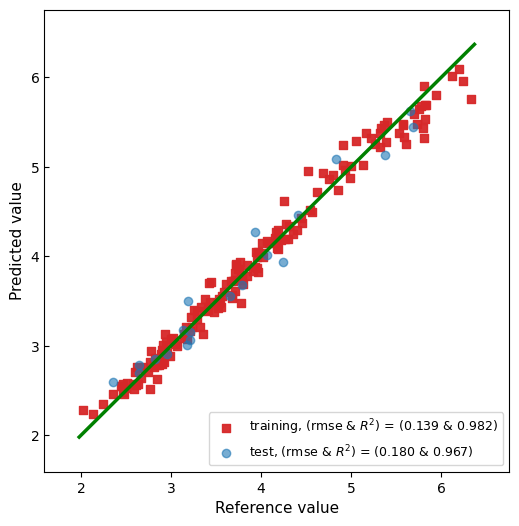

In [3]:
from matsml.models import SVecR

# Model parameters
nfold_cv = 5
model_file = 'model_svr.pkl'
verbosity = 0
rmse_cv = False
regular_param = 2
kernel = 'rbf'
max_iter = -1

model_params = {
    'kernel': kernel,
    'nfold_cv': nfold_cv,
    'regular_param': regular_param,
    'max_iter': max_iter,
    'model_file': model_file,
    'verbosity': verbosity,
    'rmse_cv': rmse_cv
}

model = SVecR(data_params=data_params, model_params=model_params)
model.train()
model.plot(pdf_output=False)

__Model 2: Random Forest Regression__

  
  Checking parameters
    all passed                   True
 
  Learning fingerprinted/featured data
    algorithm                    random forest regression w/ scikit-learn
    nfold_cv                     5
    n_estimators                 20
    max_depth                    8
    criterion                    friedman_mse
    get_feature_importances      True
    random_state                 11
  
  Read data
    data file                    fp_hoips_S1_1dest.csv.gz
    data size                    192
    training size                89.6  %
    test size                    10.4  %
    x dimensionality             32
    y dimensionality             1
    y label(s)                   ['Ymean']
  
  Scaling x                      minmax
    xscaler saved in             xscaler.pkl
  
  Scaling y                      normalize
  
  Prepare train/test sets        random
  
  Training model w/ cross validation
    cv,rmse_train,rmse_test,rmse_opt: 0 0.087833 0.239798 0.239798
    cv

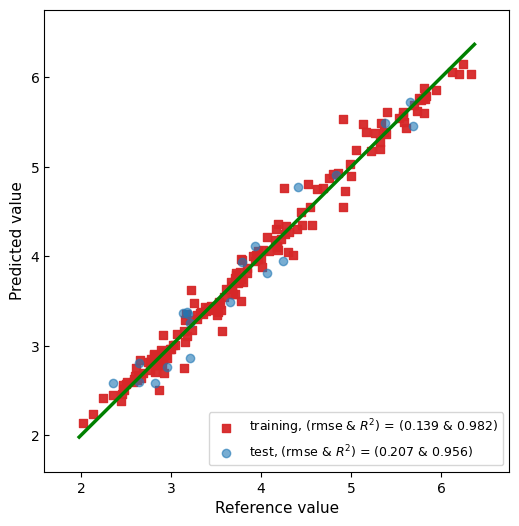

In [4]:
from matsml.models import RFR

# Model parameters
nfold_cv = 5
model_file = 'model_rfr.pkl'
verbosity = 0
rmse_cv = False
n_estimators = 20
random_state = 11
criterion = 'friedman_mse'
max_depth = 8
get_feature_importances = True

model_params = {
    'nfold_cv': nfold_cv,
    'n_estimators': n_estimators,
    'random_state': random_state,
    'criterion': criterion,
    'max_depth': max_depth,
    'get_feature_importances': get_feature_importances,
    'model_file': model_file,
    'verbosity': verbosity,
    'rmse_cv': rmse_cv
}

model = RFR(data_params=data_params, model_params=model_params)
model.train()
model.plot(pdf_output=False)

__Model 3: Kernel Ridge Regression (KRR)__

  
  Checking parameters
    all passed                   True
 
  Learning fingerprinted/featured data
    algorithm                    kernel ridge regression w/ scikit-learn
    kernel                       rbf
    nfold_cv                     5
    alpha                        [-2, 5]
    gamma                        [-2, 5]
    number of alpha/gamma grids  10
  
  Read data
    data file                    fp_hoips_S1_1dest.csv.gz
    data size                    192
    training size                89.6  %
    test size                    10.4  %
    x dimensionality             32
    y dimensionality             1
    y label(s)                   ['Ymean']
  
  Scaling x                      minmax
    xscaler saved in             xscaler.pkl
  
  Scaling y                      normalize
  
  Prepare train/test sets        random
  
  Building model                 KRR
  
  Training model w/ cross validation
  
  KRR model trained, now make predictions & invert scaling
    unsc

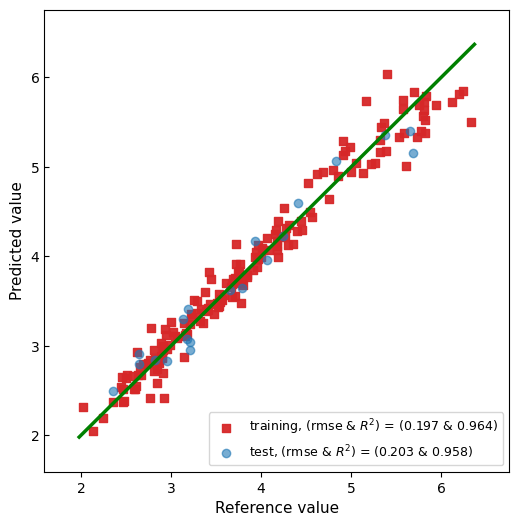

In [5]:
from matsml.models import KRR

# Model parameters
nfold_cv = 5
model_file = 'model_krr.pkl'
alpha = [-2, 5]
gamma = [-2, 5]
n_grids = 10
kernel = 'rbf'

model_params = {
    'kernel': kernel,
    'nfold_cv': nfold_cv,
    'model_file': model_file,
    'alpha': alpha,
    'gamma': gamma,
    'n_grids': n_grids
}

model = KRR(data_params=data_params, model_params=model_params)
model.train()
model.plot(pdf_output=False)

__Model 4: Gaussian Process Regression__

  
  Checking parameters
    all passed                   True
 
  Learning fingerprinted/featured data
    algorithm                    gaussian process regression w/ scikit-learn
    kernel                       RBF
    nfold_cv                     5
    optimizer                    fmin_l_bfgs_b
    n_restarts_optimizer         100
    noise_lb                     0.1
    noise_ub                     10
    rmse_cv                      False
  
  Read data
    data file                    fp_hoips_S1_1dest.csv.gz
    data size                    192
    training size                89.6  %
    test size                    10.4  %
    x dimensionality             32
    y dimensionality             1
    y label(s)                   ['Ymean']
  
  Scaling x                      minmax
    xscaler saved in             xscaler.pkl
  
  Scaling y                      normalize
  
  Prepare train/test sets        random
  
  Training model w/ cross validation
    cv,rmse_train,rmse_test,

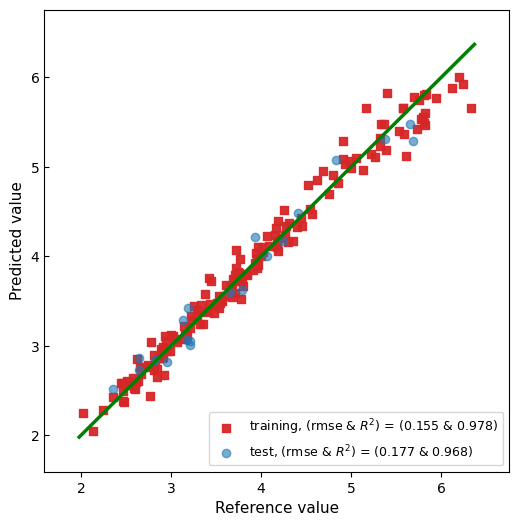

In [6]:
from matsml.models import GPR

# Model parameters
nfold_cv = 5
model_file = 'model_gpr.pkl'
verbosity = 0
n_restarts_optimizer = 100

model_params = {
    'nfold_cv': nfold_cv,
    'n_restarts_optimizer': n_restarts_optimizer,
    'model_file': model_file,
    'verbosity': verbosity
}

model = GPR(data_params=data_params, model_params=model_params)
model.train()
model.plot(pdf_output=False)

__Model 5: Fully-Connected Neural Net__

2025-12-06 22:16:06.325098: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


  
  Checking parameters
    model_file not ends with ".weights.h5", renamed             

  Learning fingerprinted/featured data
    algorithm                    fully connected NeuralNet w/ TensorFlow
    layers                       [5, 5]
    activ_funct                  elu
    epochs                       300
    optimizer                    nadam
    nfold_cv                     5
    verbosity                    0
  
  Read data
    data file                    fp_hoips_S1_1dest.csv.gz
    data size                    192
    training size                89.6  %
    test size                    10.4  %
    x dimensionality             32
    y dimensionality             1
    y label(s)                   ['Ymean']
  
  Scaling x                      minmax
    xscaler saved in             xscaler.pkl
  
  Scaling y                      normalize
  
  Prepare train/test sets        random
  
  Building model                 FCNN


I0000 00:00:1765077367.510046 1027169 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 4598 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2060, pci bus id: 0000:01:00.0, compute capability: 7.5


  Training model w/ cross validation


2025-12-06 22:16:08.108660: I external/local_xla/xla/service/service.cc:163] XLA service 0x152efcd5a5c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-12-06 22:16:08.108672: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (0): NVIDIA GeForce RTX 2060, Compute Capability 7.5
2025-12-06 22:16:08.115108: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-12-06 22:16:08.124861: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 90501
I0000 00:00:1765077368.171835 1027267 device_compiler.h:196] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


2/2 [==============================] - 0s 797us/step
    cv,rmse_train,rmse_test,rmse_opt: 0 0.197491 0.241717 0.241717
2/2 [==============================] - 0s 698us/step
    cv,rmse_train,rmse_test,rmse_opt: 1 0.137095 0.219245 0.219245
2/2 [==============================] - 0s 802us/step
    cv,rmse_train,rmse_test,rmse_opt: 2 0.119732 0.191045 0.191045
2/2 [==============================] - 0s 738us/step
    cv,rmse_train,rmse_test,rmse_opt: 3 0.119843 0.134300 0.134300
2/2 [==============================] - 0s 896us/step
    cv,rmse_train,rmse_test,rmse_opt: 4 0.110045 0.155503 0.134300
    Optimal ncv:  3 ; optimal NET saved
  FCNN trained, now make predictions & invert scaling
6/6 [==============================] - 0s 557us/step
    unscaling y: normalize
       rmse training     Ymean            0.127827
1/1 [==============================] - 0s 11ms/step
    unscaling y: normalize
       rmse test         Ymean            0.149506
  Predictions made & saved in "training.csv" 

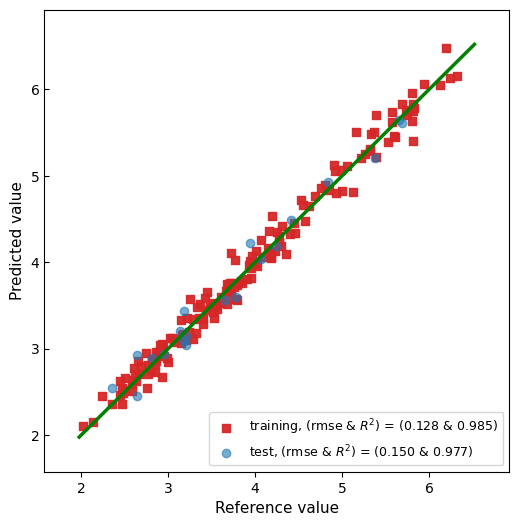

In [7]:
from matsml.models import FCNN

# model parameters
layers = [5, 5]
epochs = 300
nfold_cv = 5
use_bias = True
model_file = 'model_fcnn.pkl'
loss = 'mse'
verbosity = 0
batch_size = 32
activ_funct = 'elu'
optimizer = 'nadam'

model_params = {
    'layers': layers,
    'activ_funct': activ_funct,
    'epochs': epochs,
    'nfold_cv': nfold_cv,
    'optimizer': optimizer,
    'use_bias': use_bias,
    'model_file': model_file,
    'loss': loss,
    'batch_size': batch_size,
    'verbosity': verbosity,
    'rmse_cv': False
}

model = FCNN(data_params=data_params, model_params=model_params)
model.train()
model.plot(pdf_output=False)